# Algoritmia
## Práctica Obligatoria 2
### Curso 2022 - 2023
###### Métodos Divide y Vencerás
---
 

#### Autores:
Pablo Zarzosa Buitrago 
e Iñigo Sanz Delgado

---
Resuelva la siguiente práctica.


**Recuerda**: 
* Solamente puedes utilizar librerías nativas (https://docs.python.org/es/3.7/library/index.html).
  * <sub><sup>_Importe las librerías que desees._</sup></sub>
* Se recomienda utilizar un entorno con la versión 3.7 (`conda create -n <nombre_entorno> python=3.7`). Más información en https://conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html.
* Las funciones que importes no son "gratis", cada una tendrá una complejidad temporal y espacial que se tendrá que tener en cuenta.
* Las funciones que crees, han de estar en una celda que comience por `#testeable` para que se importe en los test.

**Entrega**
* Poner el nombre del fichero como: `<apellidosPrimerAlumno>_<apellidosSegundoAlumno>_dyv.ipynb`.
    * <sub><sup>_En caso de que el fichero no tenga ese nombre, la entrega tendrá una penalización de **2 puntos**_></sup></sub>
* Verificar que la entrega no está corrupta.
    * <sub><sup>_En caso de que la entrega está corrupta, se evaluará con **0 puntos**_.</sup></sub>
* Ambos alumnos tendrán que hacer la entrega.
    * <sub><sup>_En caso de que uno no la haga se evaluará como **No presentado**, si las entregas son diferentes tendrá cada una una penalización de **2 puntos**_ y se corregirán por separado.</sup></sub>


In [1]:
#testeable
# Imports útiles
import random
import time
import matplotlib.pyplot as plt

In [2]:
#testeable
# Versión ligeramente modificada de la práctica anterior que incluye
# un campo entero id que identifica el tipo de Sopa
class Sopa:
    """
    Clase Sopa. 
    Representa una sopa o caldo.
    """    
    
    def __init__(self, nombre, coste, id):
        """Crea un objeto de clase Sopa

        Parameters
        ----------
        nombre : str
            Nombre de la sopa
        coste : number
            Coste de hacer una olla de sopa
        """
        self.nombre = nombre
        self.coste = coste
        self.id = id
    
    def __hash__(self):
        """Genera el valor hash identificativo de la sopa

        Returns
        -------
        int
            Valor hash
        """        
        #Generar el valor hash identificativo de la sopa
        return hash(self.nombre)   
    
    def __str__(self):
        """Genera una cadena descriptiva del objeto

        Returns
        -------
        str
            Cadena descriptiva
        """        
        #Generar una cadena descriptiva del objeto
        return "Sopa: " + self.nombre + " Coste: " + str(self.coste)    
    
    def __repr__(self):
        """Genera una cadena descriptiva del objeto dentro de colecciones

        Returns
        -------
        str
            Cadena descriptiva
        """  
        #Generar una cadena descriptiva del objeto dentro de colecciones
        return "Sopa: " + self.nombre + " Coste: " + str(self.coste)
        
    """Funciones del profesor"""
    def __eq__(self, obj):
        return self.nombre == obj.nombre and self.id == obj.id
    
    def __lt__(self, obj):
        return self.id < obj.id

In [3]:
#testeable
def key_sort(seq, key_function=lambda x:x, reverse=False):
    """Ordena ascendentemente una secuencia utilizando una función clave.

    Parameters
    ----------
    seq : sequence
        Secuencia a ordenar, por ejemplo una lista
    key_function : int
        Función que devuelve para los elementos de la secuencia un valor
        clave para la ordenación
    reverse: boolean
        Si es True Invierte el orden de la ordenación.
    
    Notes
    -----
    No tiene retorno. Ordena en el sitio la secuencia de entrada.
    """
    # Definimos la funcion que hará la ordenación
    def ordenar(seq):
        if len(seq) <= 1:
            return seq
        else:
            izq = ordenar(seq[:len(seq)//2])
            der = ordenar(seq[len(seq)//2:])
            return intercalar(izq, der)
                   
    # Definimos la funcion que intercala dos secuencias ordenadas
    def intercalar(izq, der):
        resu = [] # Secuencia resultado
        i, j = 0, 0 # Contadores
        # Mientras no se llegue al final de alguna de las secuencias
        while i < len(izq) and j < len(der):
            # Utilizamos la key_function para comparar los elementos
            if key_function(izq[i]) < key_function(der[j]):
                resu.append(izq[i])
                i += 1
            else:
                resu.append(der[j])
                j += 1

        resu += izq[i:] # Añadimos el resto de la secuencia no vacía
        resu += der[j:]
        return resu
    
    # Llamamos a la funcion que hará la ordenación
    seq[:] = ordenar(seq)
    if reverse:
        seq.reverse()

In [4]:
#testeable
def calcula_popularidad(registro, method="bruteforce"):
    """Calcula la popularidad de cada tipo de sopa.

    Parameters
    ----------
    registro : sequence
        Secuencia de unidades vendidas de tipo Sopa
    method: String
        Algoritmo a emplear, 'bruteforce' o 'divideandconquer'.
    
    Returns
    -------
    dict
        Diccionario de tipos únicos de sopa (claves) y unidades
        vedidas de cada tipo (valores). El resultado sólo contiene
        claves para los tipos de sopa con al menos una ud. vendida
        
    Notes
    -----
    Si se emplea el método "divideandconquer" se asume que registro
    está ordenado por tipo de sopa. 
    
    """    
    # Algoritmo de cálculo de popularidad basado en el método "bruteforce"
    if method == "bruteforce":
        # Algoritmo de cálculo de popularidad basado en el método "bruteforce"
        # Inicializar el diccionario de popularidad
        popularidad = {}
        # Recorrer el registro
        for sopa in registro:
            # Si la sopa no está en el diccionario de popularidad
            if sopa not in popularidad:
                # Añadir la sopa al diccionario de popularidad
                popularidad[sopa] = 1
            # Si la sopa está en el diccionario de popularidad
            else:
                # Incrementar la popularidad de la sopa
                popularidad[sopa] += 1
        # Devolver el diccionario de popularidad
        return popularidad
    # Algoritmo de cálculo de popularidad basado en el método "divideandconquer"
    elif method == "divideandconquer":
        # Definir la función merge, que recibe dos diccionarios y devuelve
        # Hemos tenido el error MemoryError, por lo que hemos entendido es por que se duplican datos o se crean muchos datos
        # O que hemos anidado de forma no eficiente los bucles
        # Podiamos haber llamado a la funcion que definimos arriba pero al hacer los cambios nos dieron errores y retrocedimos en este paso
        def merge(left, right):
            for sopa, popularidad in right.items():
                if sopa in left:
                    left[sopa] += popularidad
                else:
                    left[sopa] = popularidad
            return left
        # Definir la función divideandconquer, que recibe una secuencia y devuelve un diccionario
        def divideandconquer(registro):
            if not registro:
                return {}
            elif len(registro) == 1:
                return {registro[0]: 1}
            else:
                mid = len(registro) // 2
                left = divideandconquer(registro[:mid])
                right = divideandconquer(registro[mid:])
                return merge(left, right)
        # Llamar a la función divideandconquer y devolver el resultado
        return divideandconquer(registro)


### Comparación de tiempos de ejecución
Compara de manera empírica a continuación los tiempos de ejecución de ambas versiones de *calcula_popularidad* sobre registros, ordenados por id, de diferentes tamaños. Añade las celdas que necesites.

Utiliza el modulo *time* (https://docs.python.org/3/library/time.html) o simplemente el comando mágico de Jupyter *%time* (
https://ipython.readthedocs.io/en/stable/interactive/magics.html)

Trata de investigar los siguientes aspectos:
* ¿Cómo crece el tiempo de ejecución en función del tamaño de la entrada?
Para el método "divideandconquer", el tiempo de ejecución crece logarítmicamente con el tamaño de la entrada, ya que se divide recursivamente el registro en mitades hasta que se alcanza el caso base de tener un solo elemento. Luego, se combinan las soluciones parciales mediante la función "merge". La complejidad temporal del algoritmo "merge" es lineal en el tamaño de la suma de los diccionarios de entrada. En el peor caso, si todos los elementos del registro son diferentes, la complejidad temporal sería O(n*log n + n^2), donde n es el tamaño del registro. En la práctica, la complejidad sería menor si hay muchas repeticiones en el registro.
* ¿Sobre qué tamaño máximo podrías calcular la popularidad de las sopas vendidas en un tiempo razonable, utilizando una versión o la otra?
En cuanto al tamaño máximo que se podría calcular en un tiempo razonable, dependerá de la implementación específica del algoritmo y de la capacidad de procesamiento del sistema en el que se ejecute. En general, el método "bruteforce" podría manejar registros de hasta varios millones de elementos sin problemas en una computadora moderna. Para el método "divideandconquer", el límite dependerá de la cantidad de RAM disponible, ya que se requiere mantener en memoria los diccionarios parciales que se van creando en la recursión. En general, se podrían manejar registros de varios cientos de miles o millones de elementos en una computadora moderna con suficiente RAM

Recuerda que asumimos que partimos del registro de ventas ordenado por id.

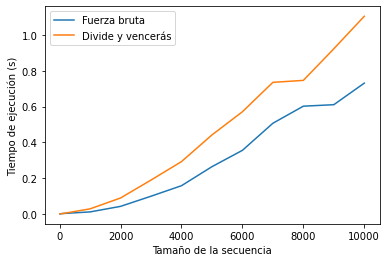

In [5]:
# Tamaños de secuencia a probar
sizes = [10, 100, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]

# Listas para almacenar los tiempos de ejecución y los tamaños de las secuencias
timesFuerza = []
timesDyV = []
sizes_list = []

# Bucle para probar los tamaños de secuencia
for size in sizes:
    # Generar secuencia de tamaño size
    registro = [Sopa("Sopa" + str(random.randint(1, 100)), random.randint(1, 100), random.randint(1, 100)) for i in range(size)]
    # Calcular tiempo de ejecución del algoritmo de fuerza bruta
    start = time.time()
    calcula_popularidad(registro, method="bruteforce")
    end = time.time()
    timesFuerza.append(end - start)
    # Calcular tiempo de ejecución del algoritmo de divide y vencerás
    start = time.time()
    calcula_popularidad(registro, method="divideandconquer")
    end = time.time()
    timesDyV.append(end - start)
    # Añadir el tamaño de la secuencia a la lista de tamaños
    sizes_list.append(size)
    
# Crear gráfica
plt.plot(sizes_list, timesFuerza, label="Fuerza bruta")
plt.plot(sizes_list, timesDyV, label="Divide y vencerás")
plt.xlabel("Tamaño de la secuencia")
plt.ylabel("Tiempo de ejecución (s)")
plt.legend()
plt.show()

#### Caso de ejemplo

In [6]:
import unittest,random

# Catálogo de sopas, caldos y estofados
s0 = Sopa("Sopa de pollo", 2, 0) # nombre, coste, id
s1 = Sopa("Vichyssoise", 4, 1)
s2 = Sopa("Crema de espárragos", 1.5, 2)
s3 = Sopa("Sopa de cocido", 1.2, 3)
s4 = Sopa("Caldo montañés", 5, 4)
s5 = Sopa("Sopa de langosta", 9, 5)

# registro de ventas
registro_test = [s1, s0, s2 ,s3, s1, s3, s4, s0, s0, s0]

class TestKeySort(unittest.TestCase):
    
    def test_basic_sort(self):
        v = list(range(10))
        random.seed = 1234
        random.shuffle(v)
        key_sort(v)
        self.assertEqual(v, list(range(10))) 
    
    def test_sopas_sort(self):
        v = registro_test.copy()
        key_sort(v) # ordena por el criterio de comparación definido en Sopa(id)
        self.assertEqual(v,list(sorted(registro_test)))
        
        key_sort(v, key_function=lambda x:x.coste, reverse=True)
        self.assertEqual(v,list(sorted(registro_test,key=lambda x:x.coste, reverse = True)))

class TestPopularidad(unittest.TestCase):
    
    def test_popularidad_basico(self):
        self.assertDictEqual (calcula_popularidad(registro_test),
                              {s0: 4, s1: 2, s2: 1, s3: 2, s4: 1})
        self.assertDictEqual (calcula_popularidad(sorted(registro_test), method="divideandconquer"),
                              {s0: 4, s1: 2, s2: 1, s3: 2, s4: 1})
        self.assertDictEqual (calcula_popularidad(sorted(registro_test*2), method="divideandconquer"),
                              {s0: 8, s1: 4, s2: 2, s3: 4, s4: 2})
        self.assertDictEqual (calcula_popularidad([s0]*40+[s1]*50+[s2]*60),
                              {s0: 40, s1: 50, s2: 60})  
        self.assertDictEqual (calcula_popularidad([s0]*40+[s1]*50+[s2]*60, method="divideandconquer"),
                              {s0: 40, s1: 50, s2: 60})       

if __name__ == "__main__":
    unittest.main(argv=['first-arg-is-ignored'], exit=False)
    

...
----------------------------------------------------------------------
Ran 3 tests in 0.042s

OK


##### **Tests**

Para probar que tu solución pasa los tests. Utilice el comando:

```bash
$ python tests-py3<version de python> <mi notebook>
```

Los tests necesitan de la librería `nbformat`

```bash
$ pip install nbformat
```

###### Explicación de los tests
* `test_basic_sort`, `test_sopas_sort` y `test_popularidad_basico`: Son los mismos que los casos de ejemplo.
* `test_key_sort`: Comprueba el algoritmo de ordenación con diferentes funciones clave.
* `test_popularidad_limite`: Comprueba varios casos límite de la función `calcula_popularidad` tanto para fuerza bruta como para divide y vencerás.
* `test_popularidad_combinaciones`: Comprueba varias combinaciones de cantidades de sopa, tanto para fuerza bruta como para divide y vencerás.
* `test_popularidad_perform`: Comprueba el rendimiento de la función `calcula_popularidad` para divide y vencerás. El tiempo de ejecución debería ser en torno a 1 segundo.

---

### **Informe**
Contesta a las siguientes preguntas.


#### **Análisis de la complejidad**

1. Método `key_sort`
    * **Complejidad temporal**: La complejidad temporal del algoritmo es O(n log n), ya que se utiliza el algoritmo de ordenación "Merge Sort" que tiene esta complejidad en promedio. 
    * **Complejidad espacial**: La complejidad espacial es O(n), ya que se utiliza una cantidad de memoria proporcional al tamaño de la secuencia de entrada.
2. Método `calcular_popularidad`. Asume que el número de sopas distintas es siempre menor que una constante.
    * **Complejidad temporal**: La complejidad temporal del algoritmo "bruteforce" es de O(n), donde n es el número de elementos en el registro. Esto se debe a que se recorre el registro una sola vez para calcular la popularidad de cada tipo de sopa. La complejidad temporal del algoritmo "divideandconquer" es de O(n log n), donde n es el número de elementos en el registro. Esto se debe a que se realiza una división recursiva del registro en dos mitades hasta que sólo quede un elemento en cada mitad, lo que implica log n divisiones. Después, se realiza una operación de mezcla en cada nivel de la recursión, que toma O(n) tiempo. Por lo tanto, la complejidad total es O(n log n)
    * **Complejidad espacial**: En cuanto a la complejidad espacial, ambas funciones utilizan diccionarios para almacenar la popularidad de cada tipo de sopa, por lo que la complejidad espacial es de O(k), donde k es el número de tipos únicos de sopa en el registro. En el caso del algoritmo "bruteforce", k es como máximo igual a n, mientras que en el caso del algoritmo "divideandconquer", k es igual al número de tipos únicos de sopa en cada mitad del registro. En el peor de los casos, si todos los elementos del registro son de un tipo diferente, la complejidad espacial será de O(n)

#### **Ordenar registro de unidades vendidas**

* ¿Como afecta la funcion clave, que proporciona el criterio de ordenacion, a la complejidad temporal del algoritmo?

La función clave es de tiempo de ejecución lineal o cuadrática, entonces la complejidad temporal del algoritmo de ordenación puede aumentar a O(n^2) o incluso O(n^3), respectivamente. Por lo tanto, es importante elegir una función clave que tenga una complejidad temporal lo más cercana posible a la constante para minimizar la complejidad temporal del algoritmo de ordenación.

* ¿Qué estrategia crees que emplea CUCHARA para devolver el registro ordenado en O(1)?

Calcular la popularidad y devolver solo el primer registro

#### **Calcular popularidad de las sopas**

* ¿Has conseguido mejorar la complejidad temporal mediante la solucion Divide y Venceras? ¿Por que ha mejorado? ¿Cuanto ha mejorado? Pon algunos ejemplos numericos especulativos que relacionen el tamano del problema con el tiempo de ejecucion en ambas versiones. Contrástalos de forma empírica empleando para ello tu implementación.

Resultado en la grafica

* Al emplear la versión 'divideandconquer' se asume que la entrada está ordenada por tipo de sopa. Si no es así, la salida de la popularidad de los platos será arbitraria, posiblemente incorrecta. ¿Sería razonable implementar alguna medida para detectar si la entrada no está ordenada?

Sí, sería razonable implementar alguna medida para detectar si la entrada no está ordenada antes de utilizar el método "divideandconquer", ya que este método asume que la entrada está ordenada por tipo de sopa. Si la entrada no está ordenada, el resultado del algoritmo puede ser incorrecto.